In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [5]:
import requests
requests.__version__

'2.26.0'

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Above code replaces the following
# Loop through all the cities in our list.
# for i in range(len(cities)):

    #Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oktyabrskiy
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | nikel
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hastings
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | south lake tahoe
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | outjo
Processing Record 19 of Set 1 | bouna
Processing Record 20 of Set 1 | dolni poustevna
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | vaini
Pro

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | batemans bay
Processing Record 41 of Set 4 | maniitsoq
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | enkhuizen
Processing Record 47 of Set 4 | haibowan
City not found. Skipping...
Processing Record 48 of Set 4 | maceio
Processing Record 49 of Set 4 | jalingo
Processing Record 50 of Set 4 | bowen
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | los llanos de aridane
Processing Record 3 of Set 5 | malwan
City not found. Skipping...
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | palu
Processing Record 8 of Set 5 | weinan
Processing Record 9 of Set 5 | takoradi
Processing Record 10 of Set 5 | amderma
City not

Processing Record 24 of Set 8 | kuche
City not found. Skipping...
Processing Record 25 of Set 8 | quatre cocos
Processing Record 26 of Set 8 | constitucion
Processing Record 27 of Set 8 | tapaua
City not found. Skipping...
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | palmer
Processing Record 30 of Set 8 | pudozh
Processing Record 31 of Set 8 | tarime
Processing Record 32 of Set 8 | koutiala
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | bilibino
Processing Record 35 of Set 8 | amapa
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | kautokeino
Processing Record 38 of Set 8 | salsomaggiore terme
Processing Record 39 of Set 8 | wajir
Processing Record 40 of Set 8 | batagay-alyta
Processing Record 41 of Set 8 | raudeberg
Processing Record 42 of Set 8 | kailua
Processing Record 43 of Set 8 | ninghai
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | 

Processing Record 15 of Set 12 | coudekerque-branche
Processing Record 16 of Set 12 | oxapampa
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | kasumkent
Processing Record 19 of Set 12 | tilichiki
Processing Record 20 of Set 12 | tautira
Processing Record 21 of Set 12 | teguldet
Processing Record 22 of Set 12 | rudnogorsk
Processing Record 23 of Set 12 | agadir
Processing Record 24 of Set 12 | strzelce krajenskie
Processing Record 25 of Set 12 | yerbogachen
Processing Record 26 of Set 12 | along
Processing Record 27 of Set 12 | port lincoln
Processing Record 28 of Set 12 | kiunga
Processing Record 29 of Set 12 | itarema
Processing Record 30 of Set 12 | karaul
City not found. Skipping...
Processing Record 31 of Set 12 | hwange
Processing Record 32 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 33 of Set 12 | bijie
Processing Record 34 of Set 12 | saraland
Processing Record 35 of Set 12 | cartagena
Processing Record 36 of Set 12 | gondal
P

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oktyabrskiy,54.4815,53.4710,9.97,91,100,3.67,RU,2022-01-23 18:48:17
1,Carnarvon,-24.8667,113.6333,80.67,61,1,20.71,AU,2022-01-23 18:48:17
2,Nikel,69.4128,30.2220,35.78,83,100,26.66,RU,2022-01-23 18:48:18
3,Puerto Ayora,-0.7393,-90.3518,80.56,79,100,11.97,EC,2022-01-23 18:48:18
4,Hobart,-42.8794,147.3294,61.27,90,100,4.61,AU,2022-01-23 18:48:18
5,Mataura,-46.1927,168.8643,52.48,77,100,1.52,NZ,2022-01-23 18:48:19
6,Hastings,50.8552,0.5729,43.32,76,100,7.61,GB,2022-01-23 18:48:19
7,Bluff,-46.6000,168.3333,52.81,69,94,2.51,NZ,2022-01-23 18:48:19
8,Mehamn,71.0357,27.8492,37.58,75,0,31.07,NO,2022-01-23 18:48:20
9,Busselton,-33.6500,115.3333,64.04,90,39,13.73,AU,2022-01-23 18:48:20


In [11]:
# Reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oktyabrskiy,RU,2022-01-23 18:48:17,54.4815,53.4710,9.97,91,100,3.67
1,Carnarvon,AU,2022-01-23 18:48:17,-24.8667,113.6333,80.67,61,1,20.71
2,Nikel,RU,2022-01-23 18:48:18,69.4128,30.2220,35.78,83,100,26.66
3,Puerto Ayora,EC,2022-01-23 18:48:18,-0.7393,-90.3518,80.56,79,100,11.97
4,Hobart,AU,2022-01-23 18:48:18,-42.8794,147.3294,61.27,90,100,4.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

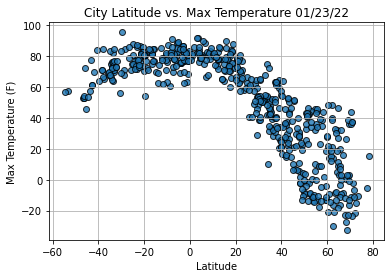

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

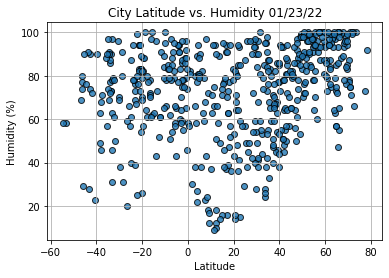

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

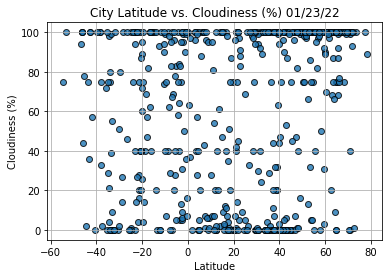

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

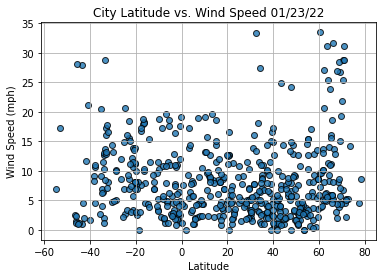

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()